In [1]:
import utils.data as data
import matplotlib.pyplot as plt

# MultiViewTemporalDataset Demonstation

In [9]:
dataset = data.MultiViewTemporalDataset(mode = "validation", apply_mask=True)

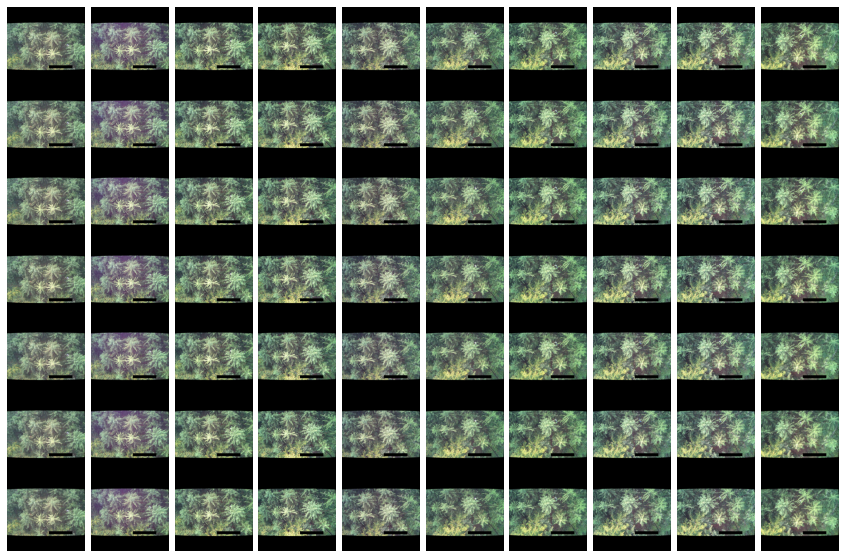

In [3]:
dataset[0].show_photo_grid()

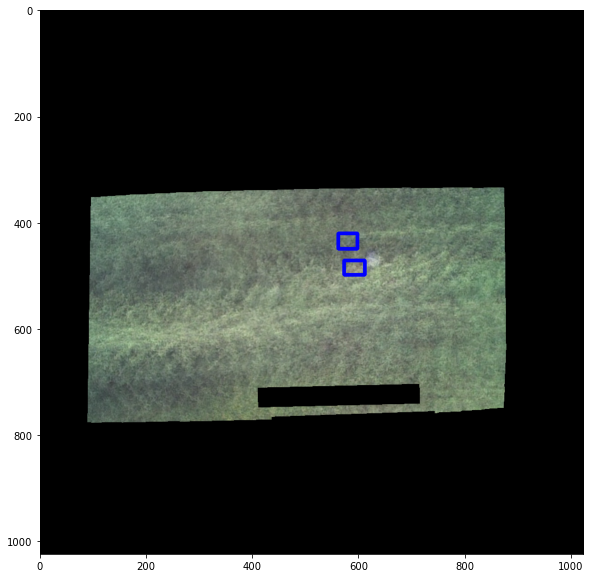

In [3]:
dataset[8].draw_labels(dataset[8].labels, on_integrated=True)

# GridCutoutDataset Demonstation

In [16]:
dataset = data.GridCutoutDataset(cutout_shape=512,mode = "validation")

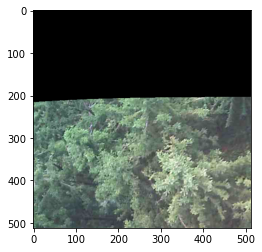

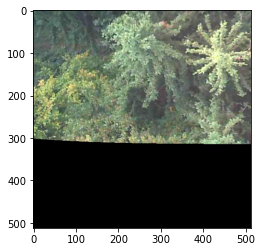

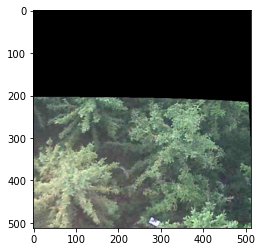

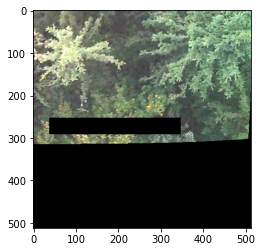

In [17]:
for i in range(4):
    plt.imshow(dataset[i])
    plt.show()

## Explore Warp-Perspective

In [1]:
import utils.data as data
import utils.sub_architectures as sub_architectures
import utils.architectures as architectures
from utils.basic_function import draw_labels
import importlib
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = data.MultiViewTemporalDataset(mode = "validation", apply_mask  = True, equalize_hist=True)

In [3]:
sample = dataset[0]

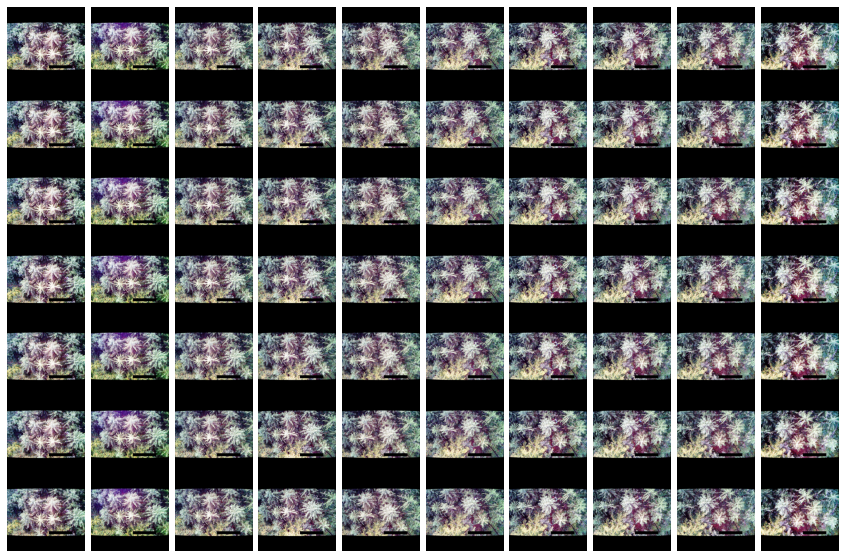

In [6]:
sample.show_photo_grid()

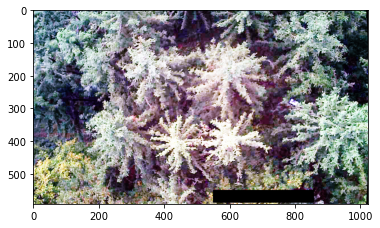

In [13]:
photo =  sample[0,0]

plt.imshow(photo[216:-216])
plt.show()

In [12]:
photo[216:-216][0,0]

array([ 77, 136, 139], dtype=uint8)

In [31]:
photo =  sample[0,0]
homography = sample.homographies[0,0]

photo = cv2.GaussianBlur(photo, (7, 7), 5)
photo = (photo!=0).astype(np.int8)*255
warped_photo = cv2.warpPerspective(photo, homography, photo.shape[:2])

bnw = []
for timestep, timestep_homography in zip(sample.photos, sample.homographies):
    perspectives = []
    for photo, homography in zip(timestep, timestep_homography):
        photo = cv2.GaussianBlur(photo, (7, 7), 5)
        photo = (photo!=0).astype(np.int8)*255
        warped_photo = cv2.warpPerspective(photo, homography, photo.shape[:2])

        perspectives.append(warped_photo)
    bnw.append(np.array(perspectives))
bnw = np.array(bnw)



In [35]:
warped_photo = np.amin(bnw, axis=(0,1))

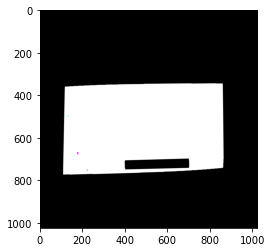

In [37]:
plt.imshow(warped_photo)
plt.show()

In [38]:
reverse_00 = cv2.warpPerspective(warped_photo, sample.homographies[0,0], warped_photo.shape[:2], cv2.WARP_INVERSE_MAP)
 

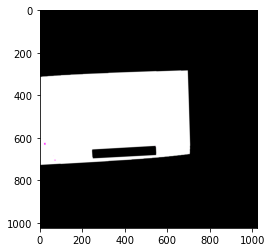

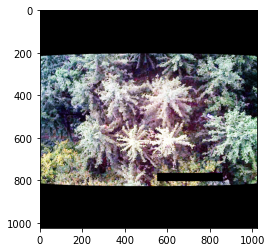

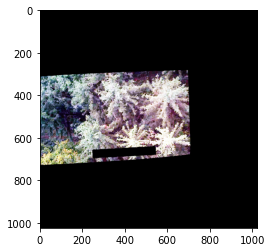

In [41]:
plt.imshow(reverse_00)
plt.show()
plt.imshow(sample[0,0])
plt.show()
sam = sample[0,0].copy()
binary = reverse_00 == 0
sam[binary] = 0
plt.imshow(sam)
plt.show()